In [68]:
%load_ext autoreload

In [83]:
%autoreload

In [75]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.losses import MeanSquaredError

from dataset import DirImagesDataset
from vgg import VggRealizer

In [73]:
minecraft_dataset = DirImagesDataset(
    '../data/minecraft_images',
    cache_path='.cache/minecraft_dataset',
    target=0.0,
    size=64,
)

loading images from dataset


100%|██████████| 10405/10405 [00:11<00:00, 876.57it/s]


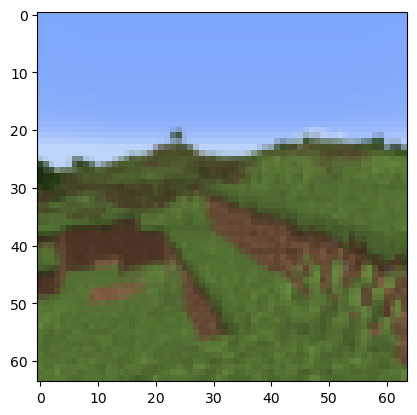

In [74]:
mc_image, _ = minecraft_dataset[random.randint(0, len(minecraft_dataset)-1)]
plt.imshow(mc_image+0.5)

In [84]:
vgg_realizer = VggRealizer()

In [ ]:
real_image = vgg_realizer(mc_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


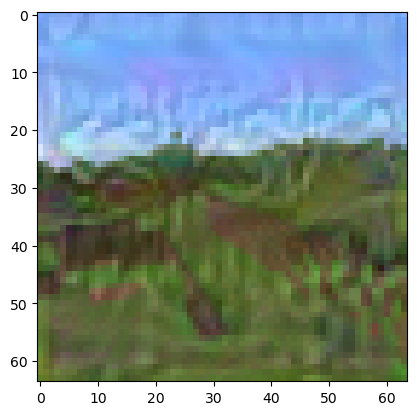

: 

In [89]:
plt.imshow(real_image[0]+0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


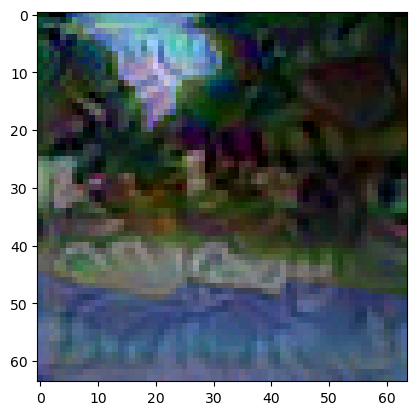

In [ ]:
plt.imshow(real_image[0]+0.5)

In [65]:
import cv2
cv2.imwrite('img.png', ((realized_image[0, ..., ::-1]+0.5)*255).astype(np.uint8))

True